# OpenCV showcase1 ～雑インスタもどきしよう～

## この章でやること
OpenCV の画像編集機能を写経する

## この章でやらないこと
1.   機械学習系機能
2.   NumpyなどのOpenCV以外のライブラリの説明(できる前提で進めます)

# Agenda
## showcase1 : 雑インスタしよう
### 1.ファイルの読み書き
* 読み(imread)
* 書き(imwrite)
* 確認(imshow)
### 2.色変換 
* 色モデルの利用(cvtColor)
* OpenCV内蔵カラーマップの利用(applyColorMap)
### 3. その他画像処理
* 二値化(threshold)
* bit変換(bitwise_not/bitwise_and)
* アルファブレンド(addWeighted)


# 1. ファイルの読み書き
OpenCVで画像処理を行うためには、まず普段皆さんが見ている画像ファイルをOpenCVが処理できる形に処理してあげるところから始まります。    
    
ファイルを読み込むimread, ファイルを書きだすimwriteはJupyter上でも.pyファイル上でも同じ書き方をしますが、
現在処理しているファイルの確認を行う場合は2通りの書き方があります。    
    
**まずは今回使用する画像をJupyter外から確認しましょう**    
確認できましたか？では先へ進みます

In [2]:
import cv2
import os
from pathlib import Path

In [3]:
# 今回使うサンプル画像
target_path = os.path.join(Path().resolve(), 'queen.jpg')

In [4]:
# 画像情報の取得
target = cv2.imread(target_path)

In [5]:
# 画像情報の書き出し
cv2.imwrite('target.jpg', target)

True

ひとつ前のカラムが正常に動いたら、このJupyter Notebookと同じディレクトリに画像ファイルができていることを確認してください。    
    
これからいろいろな画像加工を行いますが、都度ファイルに書き出して確認しながら作業するのはちょっと面倒ですよね。    
そこで途中確認用の処理をご紹介します。

In [ ]:
# 加工画像の確認(.pyファイルの場合)

# 表示確認の設定
# cv2.imshow(【ウィンドウ名】, 表示させるファイル)
# 確認後の挙動指定(なにかしらのキーが押下されたら次の処理を動かす)
# cv2.waitKey(0)
# 今開いている確認ウィンドウをすべて閉じる
# cv2.destroyAllWindows()

In [ ]:
# 加工画像の確認(Jupyterの場合)

In [6]:
import matplotlib.pyplot as plt

# インライン表示
%matplotlib inline

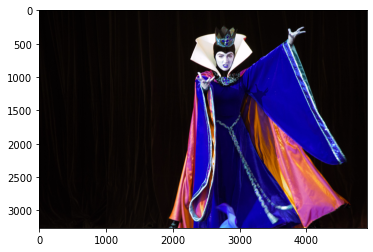

In [8]:
plt.imshow(target)

どうでしょうか。先ほどJupyterの外から見た画像と色の出方が異なりますね。    
これはOpenCVの標準的な色情報の持ち方とmatplotlibの持っている標準的な色情報の持ち方の違いが原因で引きおこる事象です    
    
通常matplotlibでは **R(赤), G(緑), B(青)** の順番で情報を保持していますが、    
OpenCVでは **B(青), G(緑), 赤(R)** の順番でデータを保持しています。    
    
どちらもただの3つの数列であるため、なにも加工しなくても画像情報を読むことができますが、認識する数値と色の組み合わせが異なるため、このような表示のズレが発生します。    
具体的には、赤色と青色が反転して表示されてしまいます。    
    
この表示色の変更については次の章で説明します。

# 2. 色モデル変換
この章では画像の簡単色加工を学びます。OpenCVには様々な色相パターンが事前に容易されており、ちょっと書くだけで様々なプリセット色相変換を楽しめます。    
もちろんご自身で色モデルを作成しを指定・変換することも可能ですが、少々コードが長くなってしまうことや別途数値計算や各色味の調整に時間がかかってしまうため、今回のハンズオンでは作業しません。    

うまく色相変換を利用して、おしゃれ画像加工に挑むことを目指して進めましょう。    
    
まずは先ほど正しく表示されなかった画像を正しく読み込ませるところから始めます。

## cvtColor
**cvtColor : 色モデル間変換を行う。変換する色モデルは定数として事前に容易されている。**    
cvtColor(【読み込む画像】, 【色相環定数】)    
    
使える色モデル定数例    

* COLOR_BGR2GRAY: BGR->グレースケール
* COLOR_BGR2RGB: BGR->RGB ([RGB色相環](https://ja.wikipedia.org/wiki/RGB))
* COLOR_BGR2HLS: BGR->HLS ([HLS色空間](https://ja.wikipedia.org/wiki/HLS%E8%89%B2%E7%A9%BA%E9%96%93))
* COLOR_BGR2HSV: BGR->HSV ([HSV色空間](https://ja.wikipedia.org/wiki/HSV%E8%89%B2%E7%A9%BA%E9%96%93))
* COLOR_BGR2YCrCb: BGR->YCrCb ([YUV色空間](https://ja.wikipedia.org/wiki/YUV))
* COLOR_BGR2XYZ: BGR->XYZ ([CIE1931色空間](https://ja.wikipedia.org/wiki/CIE_1931_%E8%89%B2%E7%A9%BA%E9%96%93))

ここではすべてBGR色モデルからの変換定数ばかりあげているが、もちろんHLSから、HSVからなどさまざまな変換定数が用意されている。


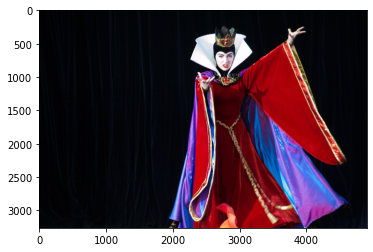

In [9]:
# RGB形式での画像表示
rgb = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)

ただしい色合いで表示されましたね。    
他の色モデルでの表示もやってみましょう。

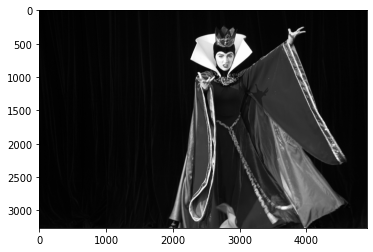

In [10]:
# グレースケール
gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

# 後程サンプル画像として使用したいので、ファイルに書き出しておきましょう。
cv2.imwrite('gray.jpg', gray)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

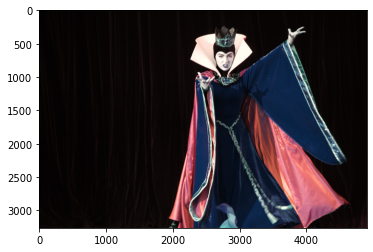

In [11]:
# 色空間での画像表示
change_color = cv2.cvtColor(target, cv2.COLOR_BGR2XYZ)

plt.imshow(cv2.cvtColor(change_color, cv2.COLOR_BGR2RGB))

## applyColorMap
**applyColorMap: OpenCV内にプリセットで用意されている色相モデル(カラーマップ)を使って色変換を行う**    
applyColorMap(【読み込む画像】, 【カラーマップ定数】)    
    
使えるカラーマップ定数例    
* COLORMAP_AUTUMN
* COLORMAP_BONE
* COLORMAP_CIVIDIS
* COLORMAP_COOL
* COLORMAP_HOT
* COLORMAP_HSV
* COLORMAP_INFERNO
* COLORMAP_JET
* COLORMAP_MAGMA
* COLORMAP_OCEAN
* COLORMAP_PARULA
* COLORMAP_PINK
* COLORMAP_PLASMA
* COLORMAP_RAINBOW
* COLORMAP_SPRING
* COLORMAP_SUMMER
* COLORMAP_TURBO
* COLORMAP_TWILIGHT

大体名前の通りのカラーマップになってるので色々試してみてください。

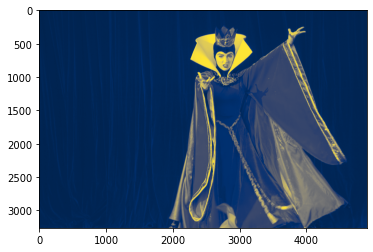

In [12]:
# カラーマップ変換
color_map = cv2.applyColorMap(target, cv2.COLORMAP_CIVIDIS)

plt.imshow(cv2.cvtColor(color_map, cv2.COLOR_BGR2RGB))

# 3. その他画像処理
色だけでなく、OpenCVのプリセット機能を使って画風を変換することもできます。    
画風変換と色変換を色々組み合わせていくとおしゃれな画像加工ができるかもしれません。

## 閾値処理(threshold)
閾値処理とは、指定した閾値に合わせて色の振り分け・変換をする処理です。    
これによりグラデーションは少なくなり、平たんで色の種類が少ない画像を作り出すことができます。    
いわゆる二値化処理です。    

**threshold: 閾値処理をおこなう**    
threshold(【読み込む画像】, 【閾値】, 【利用する最大値】, 【変換定数】)    
    
変換定数    
* cv2.THRESH_BINARY
* cv2.THRESH_BINARY_INV
* cv2.THRESH_TRUNC
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV

変換定数イメージ    
![変換定数イメージ](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/_images/threshold.jpg)

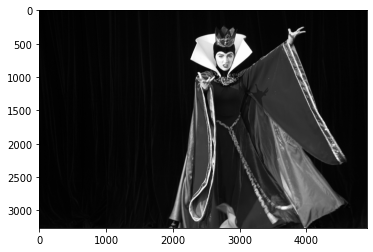

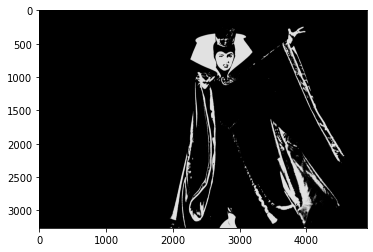

In [13]:
# グレースケールの表示(比較用)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

# グレースケールの二値化
r, mono = cv2.threshold(gray, 127, 225, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(mono, cv2.COLOR_BGR2RGB))
plt.show()

明暗に対して二値化を行うため、カラー画像に対して同じ処理を行うと、また違った見え方になります。    

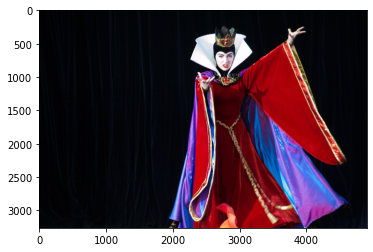

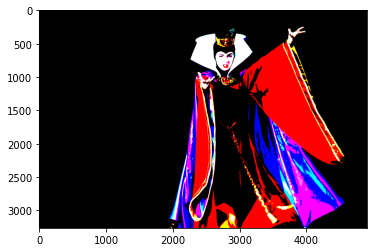

In [14]:
# カラー画像の表示(比較用)
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.show()

# カラー画像の二値化
r, paste_picture = cv2.threshold(target, 127, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(paste_picture, cv2.COLOR_BGR2RGB))
plt.show()

## エッジ検出(Canny)　※今日はやりません
Canny法と呼ばれるエッジ検出のためのアルゴリズムを利用できます。    
詳しい検出アルゴリズムついては下記を参照ください。    
[http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_canny/py_canny.html](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_canny/py_canny.html)    
    
**Canny:エッジ検出をおこなう**
Canny(【読み込むファイル】, 【最小閾値】, 【最大閾値】, 【フィルタサイズ(デフォルト3)】)    
    
この呼び出しの引数である【最小閾値】【最大閾値】はCanny法検出内で行われるヒステリシス式閾値処理に利用され、【フィルタサイズ】は[Sobelフィルタ](http://www.mis.med.akita-u.ac.jp/~kata/image/sobelprew.html)によるエッジ強度処理に使用されます。    
フィルタサイズはオプション引数です。    

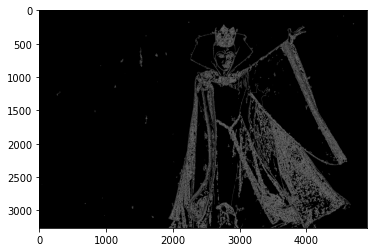

In [15]:
# エッジ検出
edge = cv2.Canny(target, 0, 80)
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))
plt.show()

## bit変換
画像情報に論理演算施すことで、さまざまな効果を得ることができます。    
    
論理演算にはbitwiseな仲間たちを利用します。    
* bitwise_and()
* bitwise_not()
* bitwise_or()
* bitwise_xor()
    
論理演算イメージ    
![論理演算イメージ](https://cvtech.cc/wp-content/uploads/2016/10/bitwise.png)    
    
今日はこの中からbitwise_notを利用したネガポジ反転と、bitwise_andを利用した色抽出をやってみます。

**bitwise_not: その画像が持っている情報を反転する**    
bitwise_not(【読み込む画像】)

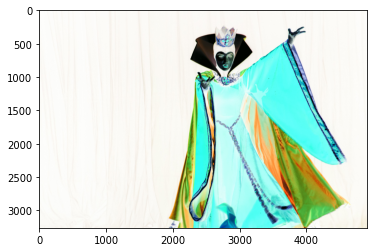

In [16]:
# ネガポジ反転
inversion = cv2.bitwise_not(target)

plt.imshow(cv2.cvtColor(inversion, cv2.COLOR_BGR2RGB))

**inRange: 有効な色相範囲を指定する**    
inRange(【読み込むファイル】, 【有効色相最小値】, 【有効色相最大値】)    
    
**bitwise_and: 2つの画像のandのみを抽出する(2つの画像の一致する部分のみを抽出する)**    
bitwise_and(【読み込むファイル1】, 【読み込むファイル2】, mask=【読み込みファイル2に使用したい色相範囲(デフォルト使用なし)】)    

In [17]:
import numpy as np

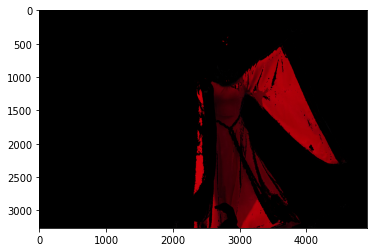

In [18]:
# 抽出する色の範囲(BGR色相)
# 今回は赤を抽出
bgr_lower = np.array([0, 0, 10])
bgr_upper = np.array([15, 15, 255])

# 指定色範囲を抽出
color_range = cv2.inRange(target, bgr_lower, bgr_upper)
extraction = cv2.bitwise_and(target, target, mask=color_range)

plt.imshow(cv2.cvtColor(extraction, cv2.COLOR_BGR2RGB))

## アルファブレンド(addWeighted)
OpenCVでは2つ以上の画像を合成することももちろん可能です。    
    
今回は前の項目で作成した赤色抽出の画像とグレースケールの画像を利用してセレクトカラー加工に挑戦してみましょう。    
    
**addWeighted: 画像の合成を行う。それぞれの画像の透過度合いも設定することができる**    
addWeighted(【読み込むファイル1】, 【ファイル1の透過度合い(0-1)】,【読み込むファイル2】, 【ファイル2の透過度合い(0-1)】)

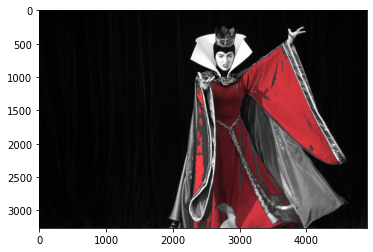

In [19]:
gray_color = cv2.imread('gray.jpg')
composition = cv2.addWeighted(gray_color, 1, extraction, 0.9, 0)

plt.imshow(cv2.cvtColor(composition, cv2.COLOR_BGR2RGB))

# これでshowcase1はおしまいです。
showcase2に進みましょう～